In [118]:
%cd C:\Users\ANIK\Desktop\Lead_Scoring_Assignment

C:\Users\ANIK\Desktop\Lead_Scoring_Assignment


In [119]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
import seaborn as sns

In [121]:
# Reading the dataset
leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [122]:
print(leads.shape)
leads.columns

(9240, 37)


Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [123]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [124]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Step 1: Data Cleaning and Preprocessing

In [125]:
# Checking missing values in each column

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [126]:
#dropping unnecessary columns like "city" and "country" 
leads.drop(['City'], axis = 1, inplace = True)
leads.drop(['Country'], axis = 1, inplace = True)

In [127]:
#percentage of missing values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [128]:
#Since some columns have null % above 50 and closer than that 
#it means absense of almost half information which would hamper our analysis
#so let's delete upto some threshhold value

for col in leads.columns:
    if leads[col].isnull().sum() > 3000:
        leads.drop(col, 1, inplace=True)
        
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

As per our objective we have to find which ones are coverted, where as going through the dataset, we figured out there 
are columns that says "select" which means that those datas are yet to be selected which means not converted, so we have to drop them as well

In [129]:
leads['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [130]:
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [131]:
leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

"Select" is the majority feature that is present 2-3 times more in __"Lead Profile"__ & __"How did you hear about X Education"__ so lets drop them

In [132]:
leads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also we see that  __Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content,  I agree to pay the amount through cheque__ are having majority % of answer as __"No"__ . So, it's better that we drop these columns as those features would unecessary effect our predicting model.

In [133]:
leads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [134]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [135]:
# Dropping the null value rows present in the column 'What matters most to you in choosing a course'

leads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [136]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [137]:
#Since there is a high percentage of null values so we drop those rows having null values in "What is your current occupation"
leads = leads[~pd.isnull(leads['What is your current occupation'])]
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [138]:
# Now lets drop the null value rows in the column 'TotalVisits'

leads = leads[~pd.isnull(leads['TotalVisits'])]
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [139]:
leads = leads[~pd.isnull(leads['Lead Source'])]
leads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [140]:
leads = leads[~pd.isnull(leads['Specialization'])]
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [141]:
#lets check how much data are we left with, since we dropped so much 
round(len(leads.index)/9240,1)

0.7

So we still have 70% of the information for carrying out the analysis which is a good news!

### Dummification

In [142]:
cols = leads.loc[:, leads.dtypes == 'object']
cols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [143]:
#we dont need "prospect id" during our analysis so we drop it along with "lead number"
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [144]:
#Dummifying all variable except "specialization" because this column has "select" whch needs to be dropped
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Adding results to leads
leads = pd.concat([leads, dummy], axis=1)

In [145]:
#dummifying "specialization"
spec_dum = pd.get_dummies(leads['Specialization'], prefix = 'Specialization')
spec_dum = spec_dum.drop(['Specialization_Select'], 1)

leads = pd.concat([leads, spec_dum], axis = 1)

In [146]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [147]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Machine Learning part 

__Train test split__

In [148]:
# Import the required library

from sklearn.model_selection import train_test_split

In [149]:
X = leads.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [151]:
# Splitting dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

__Scaling__

In [152]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [153]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(
    X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


__Model Building__

In [154]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [155]:
# Import RFE

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [156]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 23),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Pay per Click Ads', False, 41),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 37),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 38),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 32),
 ('Lead Source_testone', False, 34),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 8),
 ('Last Activity_Email Bounced', False, 4),
 ('Last Activity_Email Link Cl

In [157]:
col = X_train.columns[rfe.support_]

In [158]:
X_train = X_train[col]
import statsmodels.api as sm


#Ols mdoel of rfe

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Sun, 09 Jun 2019   Deviance:                       4145.5
Time:                        13:19:36   Pearson chi2:                 4.84e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0061      0.600     -1.677      0.094      -2.182       0.170
TotalVisits                                             11.3439      2.682      4.230      0.000       6.088      16.600
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                2.9483      1.191      2.475      0.013       0.614       5.283
Lead Source_Olark Chat                                   1.4584      0.122     11.962      0.000       1.219       1.697
Lead Source_Reference                                    1.2994      1.214      1.070      0.285      -1.080       3.679
Lead Source_Welingak Website                             3.4159      1.558      2.192      0.028       0.362       6.470
Do Not Email_Yes                                        -1.5053      0.193     -7.781      0.000      -1.884      -1.126
Last Activity_Had a Phone Conversation                   1.0397      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6492   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1544      0.630     -1.831      0.067      -2.390       0.081
What is your current occupation_Unemployed              -1.3395      0.594     -2.254      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1932   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7868      0.807      3.453      0.001       1.205       4.369
========================================================================================================================
"""

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking vif

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,84.19
4,Lead Source_Reference,65.18
5,Lead Source_Welingak Website,20.03
11,What is your current occupation_Unemployed,3.65
7,Last Activity_Had a Phone Conversation,2.44
13,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
0,TotalVisits,1.62
8,Last Activity_SMS Sent,1.59
12,What is your current occupation_Working Profes...,1.56


Since __'Lead Source_Reference'__ has high vif value as well as high p-value

In [160]:
X_train.drop('Lead Source_Reference', axis = 1, inplace = True)

In [161]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2073.2
Date:                Sun, 09 Jun 2019   Deviance:                       4146.5
Time:                        13:19:37   Pearson chi2:                 4.82e+03
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0057      0.600     -1.677      0.094      -2.181       0.170
TotalVisits                                             11.3428      2.682      4.229      0.000       6.086      16.599
Total Time Spent on Website                              4.4312      0.185     23.924      0.000       4.068       4.794
Lead Origin_Lead Add Form                                4.2084      0.259     16.277      0.000       3.702       4.715
Lead Source_Olark Chat                                   1.4583      0.122     11.960      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5036      0.193     -7.779      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   1.0398      0.983      1.058      0.290      -0.887       2.966
Last Activity_SMS Sent                                   1.1827      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Housewife               22.6511   2.45e+04      0.001      0.999    -4.8e+04     4.8e+04
What is your current occupation_Student                 -1.1537      0.630     -1.830      0.067      -2.389       0.082
What is your current occupation_Unemployed              -1.3401      0.594     -2.255      0.024      -2.505      -0.175
What is your current occupation_Working Professional     1.2748      0.623      2.046      0.041       0.053       2.496
Last Notable Activity_Had a Phone Conversation          23.1934   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Unreachable                        2.7872      0.807      3.454      0.001       1.205       4.369
========================================================================================================================
"""

In [162]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,3.65
6,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
2,Lead Origin_Lead Add Form,1.71
0,TotalVisits,1.62
7,Last Activity_SMS Sent,1.59
11,What is your current occupation_Working Profes...,1.56
3,Lead Source_Olark Chat,1.44
4,Lead Source_Welingak Website,1.33


Dropping __'Last Notable Activity_Had a Phone Conversation'__ 

In [163]:
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [164]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2076.1
Date:                Sun, 09 Jun 2019   Deviance:                       4152.2
Time:                        13:19:38   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0069      0.600     -1.679      0.093      -2.182       0.168
TotalVisits                                             11.4551      2.686      4.265      0.000       6.191      16.720
Total Time Spent on Website                              4.4237      0.185     23.900      0.000       4.061       4.787
Lead Origin_Lead Add Form                                4.2082      0.259     16.276      0.000       3.701       4.715
Lead Source_Olark Chat                                   1.4581      0.122     11.958      0.000       1.219       1.697
Lead Source_Welingak Website                             2.1557      1.037      2.079      0.038       0.124       4.188
Do Not Email_Yes                                        -1.5037      0.193     -7.780      0.000      -1.882      -1.125
Last Activity_Had a Phone Conversation                   2.7502      0.802      3.430      0.001       1.179       4.322
Last Activity_SMS Sent                                   1.1826      0.082     14.364      0.000       1.021       1.344
What is your current occupation_Housewife               21.6525   1.49e+04      0.001      0.999   -2.91e+04    2.91e+04
What is your current occupation_Student                 -1.1520      0.630     -1.828      0.068      -2.387       0.083
What is your current occupation_Unemployed              -1.3385      0.594     -2.253      0.024      -2.503      -0.174
What is your current occupation_Working Professional     1.2743      0.623      2.045      0.041       0.053       2.495
Last Notable Activity_Unreachable                        2.7862      0.807      3.453      0.001       1.205       4.368
========================================================================================================================
"""

Dropping __''What is your current occupation_Housewife'__ 

In [165]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [166]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2078.3
Date:                Sun, 09 Jun 2019   Deviance:                       4156.7
Time:                        13:19:38   Pearson chi2:                 4.83e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4528      0.554     -0.818      0.413      -1.538       0.632
TotalVisits                                             11.2586      2.672      4.214      0.000       6.023      16.495
Total Time Spent on Website                              4.4217      0.185     23.898      0.000       4.059       4.784
Lead Origin_Lead Add Form                                4.2057      0.258     16.274      0.000       3.699       4.712
Lead Source_Olark Chat                                   1.4530      0.122     11.930      0.000       1.214       1.692
Lead Source_Welingak Website                             2.1541      1.037      2.078      0.038       0.122       4.186
Do Not Email_Yes                                        -1.5063      0.193     -7.785      0.000      -1.886      -1.127
Last Activity_Had a Phone Conversation                   2.7515      0.802      3.432      0.001       1.180       4.323
Last Activity_SMS Sent                                   1.1823      0.082     14.362      0.000       1.021       1.344
What is your current occupation_Student                 -1.7017      0.588     -2.893      0.004      -2.855      -0.549
What is your current occupation_Unemployed              -1.8879      0.550     -3.435      0.001      -2.965      -0.811
What is your current occupation_Working Professional     0.7246      0.581      1.248      0.212      -0.413       1.862
Last Notable Activity_Unreachable                        2.7834      0.807      3.448      0.001       1.201       4.365
========================================================================================================================
"""

Dropping __"What is your current occupation_Working Professional"__

In [167]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [168]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.1
Date:                Sun, 09 Jun 2019   Deviance:                       4158.1
Time:                        13:19:38   Pearson chi2:                 4.80e+03
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2040      0.196      1.043      0.297      -0.179       0.587
TotalVisits                                   11.1489      2.665      4.184      0.000       5.926      16.371
Total Time Spent on Website                    4.4223      0.185     23.899      0.000       4.060       4.785
Lead Origin_Lead Add Form                      4.2051      0.258     16.275      0.000       3.699       4.712
Lead Source_Olark Chat                         1.4526      0.122     11.934      0.000       1.214       1.691
Lead Source_Welingak Website                   2.1526      1.037      2.076      0.038       0.121       4.185
Do Not Email_Yes                              -1.5037      0.193     -7.774      0.000      -1.883      -1.125
Last Activity_Had a Phone Conversation         2.7552      0.802      3.438      0.001       1.184       4.326
Last Activity_SMS Sent                         1.1856      0.082     14.421      0.000       1.024       1.347
What is your current occupation_Student       -2.3578      0.281     -8.392      0.000      -2.908      -1.807
What is your current occupation_Unemployed    -2.5445      0.186    -13.699      0.000      -2.908      -2.180
Last Notable Activity_Unreachable              2.7846      0.807      3.449      0.001       1.202       4.367
==============================================================================================================
"""

In [169]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.82
1,Total Time Spent on Website,2.00
0,TotalVisits,1.54
7,Last Activity_SMS Sent,1.51
2,Lead Origin_Lead Add Form,1.45
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30
5,Do Not Email_Yes,1.08
8,What is your current occupation_Student,1.06
6,Last Activity_Had a Phone Conversation,1.01


So all the values have low p value and vif value which is a good news and the model is built

In [170]:
#predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

8003    0.299132
218     0.141834
4171    0.127602
4037    0.291679
3660    0.956262
207     0.194437
2044    0.177750
6411    0.952857
6498    0.075665
2085    0.982340
dtype: float64

In [171]:
# Reshape of array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.29913183, 0.14183438, 0.12760155, 0.29167908, 0.95626237,
       0.19443676, 0.17775018, 0.95285672, 0.07566484, 0.98233985])

In [172]:
y_train_pred_fin = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_fin.head()

,Converted,Conversion_Prob
0,0,0.299132
1,0,0.141834
2,1,0.127602
3,1,0.291679
4,1,0.956262


In [173]:
#conversion flag and the probabily prediction of the model
y_train_pred_fin['Predicted'] = y_train_pred_fin.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_fin.head()

,Converted,Conversion_Prob,Predicted
0,0,0.299132,0
1,0,0.141834,0
2,1,0.127602,0
3,1,0.291679,0
4,1,0.956262,1


### Accuracy 

In [174]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

# Create confusion matrix 

conf_matx = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.Predicted )
print(conf_matx)

[[1932  380]
 [ 562 1587]]


In [175]:
print(metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.Predicted))

0.788836583725622


78% initial accuracy 

In [176]:
#lets evaluate TP, TN, FP, FN to increase the accuracy

TP = conf_matx[1,1] 
TN = conf_matx[0,0] 
FP = conf_matx[0,1] 
FN = conf_matx[1,0]

In [177]:
#specificity
TN/(TN+FP)

0.8356401384083045

In [178]:
#sensitivity
TP/(TP+FN)

0.7384830153559795

In [179]:
#roc curve
def roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(10, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.3f)' % auc_score )
    plt.plot([0, 1], [0, 1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR or [1 - TNR]')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [180]:
fpr, tpr, thresholds = metrics.roc_curve( 
    y_train_pred_fin.Converted, y_train_pred_fin.Conversion_Prob, drop_intermediate = False )

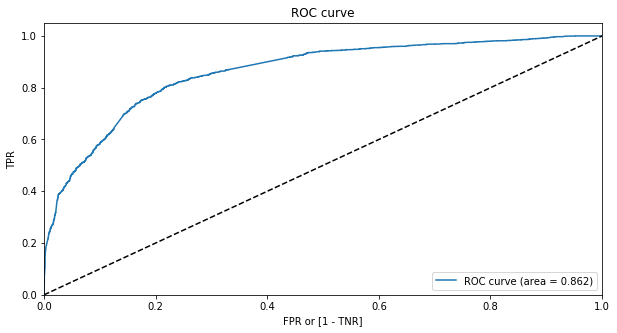

In [181]:
roc_curve(y_train_pred_fin.Converted, y_train_pred_fin.Conversion_Prob)

Roc curve takes up almost 86% of area, which is nice for our analysis

In [182]:
#lets create an optimal cut off

num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_fin[i]= y_train_pred_fin.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_fin.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.299132,0,1,1,1,0,0,0,0,0,0,0
1,0,0.141834,0,1,1,0,0,0,0,0,0,0,0
2,1,0.127602,0,1,1,0,0,0,0,0,0,0,0
3,1,0.291679,0,1,1,1,0,0,0,0,0,0,0
4,1,0.956262,1,1,1,1,1,1,1,1,1,1,1


In [183]:
opt_cutoff = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix


l1 = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for n in l1:
    c_mat= metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin[n] )
    tot=sum(sum(c_mat))
    accuracy = (c_mat[0,0]+c_mat[1,1])/tot
    
    specificity = c_mat[0,0]/(c_mat[0,0]+c_mat[0,1])
    sensitivity = c_mat[1,1]/(c_mat[1,0]+c_mat[1,1])
    opt_cutoff.loc[n] =[ n ,accuracy,sensitivity,specificity]
print(opt_cutoff)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.481731     1.000000     0.000000
0.1          0.1  0.527460     0.994416     0.093426
0.2          0.2  0.698274     0.944160     0.469723
0.3          0.3  0.767317     0.865054     0.676471
0.4          0.4  0.791975     0.809214     0.775952
0.5          0.5  0.788837     0.738483     0.835640
0.6          0.6  0.757229     0.622615     0.882353
0.7          0.7  0.735485     0.542113     0.915225
0.8          0.8  0.712620     0.454165     0.952855
0.9          0.9  0.646492     0.284318     0.983131


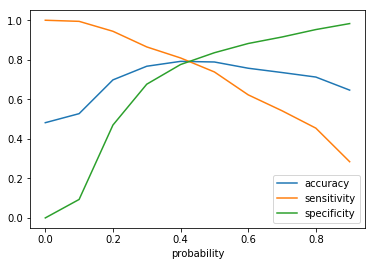

In [184]:
opt_cutoff.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [185]:
y_train_pred_fin['final_predicted'] = y_train_pred_fin.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_fin.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.299132,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.141834,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127602,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291679,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.956262,1,1,1,1,1,1,1,1,1,1,1,1


In [186]:
metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted)

0.7906299036090563

In [187]:
conf_matx1 = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted )
print(conf_matx1)

[[1824  488]
 [ 446 1703]]


In [188]:
#lets calculate the TP,TN,FP, FN again on the newly predicted cut off values
TP = conf_matx1[1,1] 
TN = conf_matx1[0,0] 
FP = conf_matx1[0,1] 
FN = conf_matx1[1,0]

In [189]:
#specificity
TN/(TN+FP)

0.7889273356401384

In [190]:
#sensitivity
TP/(TP+FN)

0.7924616100511866

The cut off point gives us an accuracy of 79% which is also good. 

### Applying the model in predicting the test set 

In [191]:
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(
    X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [192]:
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test[col])
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0


In [193]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,1,0,0,0,1,0,0,0,1,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,1,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,1,0,0,1,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,0,1,0,1,0,0,1,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,1,0,0,1,0,0,0
4233,1.0,0.000000,0.000000,0,1,0,0,1,0,1,0,0,0,1,0,0
3368,1.0,0.007968,0.705106,0,0,0,0,0,0,0,0,0,1,0,0,0
9091,1.0,0.035857,0.406690,0,0,0,0,0,0,0,0,0,1,0,0,0
5972,1.0,0.007968,0.030810,0,0,0,0,0,0,1,0,0,1,0,0,0
3631,1.0,0.019920,0.505722,0,0,0,0,0,0,1,0,0,1,0,0,0


In [194]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4771    0.996661
6122    0.130047
9202    0.703675
6570    0.298726
2668    0.721130
4233    0.802832
3368    0.704579
9091    0.465862
5972    0.281714
3631    0.786511
dtype: float64

In [195]:
y_pred_2 = pd.DataFrame(y_test_pred)

In [196]:
y_pred_2.head()

,0
4771,0.996661
6122,0.130047
9202,0.703675
6570,0.298726
2668,0.721130


In [197]:
#adding the predicted values in "converted" columns to the y_pred_fin
y_test_df = pd.DataFrame(y_test)
y_pred_2.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_fin = pd.concat([y_test_df, y_pred_2],axis=1)
y_pred_fin.head()

,Converted,0
0,1,0.996661
1,0,0.130047
2,0,0.703675
3,1,0.298726
4,1,0.721130


In [198]:
y_pred_fin= y_pred_fin.rename(columns = {0 : 'Conver_prob'})
y_pred_fin.head()

,Converted,Conver_prob
0,1,0.996661
1,0,0.130047
2,0,0.703675
3,1,0.298726
4,1,0.721130


In [199]:
y_pred_fin['final_predicted'] = y_pred_fin.Conver_prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_fin.head()

,Converted,Conver_prob,final_predicted
0,1,0.996661,1
1,0,0.130047,0
2,0,0.703675,1
3,1,0.298726,0
4,1,0.721130,1


In [200]:
metrics.accuracy_score(y_pred_fin['Converted'], y_pred_fin.final_predicted)

0.7850418410041841

In [201]:
conf_matx3 = metrics.confusion_matrix(y_pred_fin['Converted'], y_pred_fin.final_predicted )
conf_matx3

array([[787, 209],
       [202, 714]], dtype=int64)

In [202]:
#lets calculate the TP,TN,FP, FN again on the newly predicted cut off values on the test dataset
TP = conf_matx3[1,1] 
TN = conf_matx3[0,0] 
FP = conf_matx3[0,1] 
FN = conf_matx3[1,0]

In [203]:
#sensitivity
TP / float(TP+FN)

0.7794759825327511

In [204]:
#specificity
TN / float(TN+FP)

0.7901606425702812

### Precision & Recall 

In [205]:
conf = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.Predicted )
conf

array([[1932,  380],
       [ 562, 1587]], dtype=int64)

In [206]:
#precision
conf[1,1]/(conf[0,1]+conf[1,1])

0.8068124046771734

In [207]:
#recall
conf[1,1]/(conf[1,0]+conf[1,1])

0.7384830153559795

#### precision and recall trade off 

In [208]:
from sklearn.metrics import precision_recall_curve

In [209]:
p, r, thresholds = precision_recall_curve(y_train_pred_fin.Converted, y_train_pred_fin.Conversion_Prob)

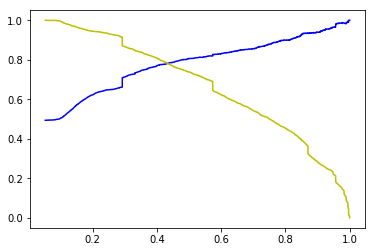

In [210]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "y-")
plt.show()

In [211]:
y_train_pred_fin['final_predicted'] = y_train_pred_fin.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)

y_train_pred_fin.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.299132,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.141834,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.127602,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.291679,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.956262,1,1,1,1,1,1,1,1,1,1,1,1


In [212]:
metrics.accuracy_score(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted)

0.7915265635507733

In [213]:
conf_matx4 = metrics.confusion_matrix(y_train_pred_fin.Converted, y_train_pred_fin.final_predicted )
conf_matx4

array([[1815,  497],
       [ 433, 1716]], dtype=int64)

In [214]:
#lets calculate the TP,TN,FP, FN again on the precision recall trade off on the basis of the test dataset
TP = conf_matx4[1,1] 
TN = conf_matx4[0,0] 
FP = conf_matx4[0,1] 
FN = conf_matx4[1,0]

In [215]:
#Precision
TP/(TP+FP)

0.7754179846362403

In [216]:
#Recall
TP/(TP+FN)

0.798510935318753

The cut off point is very good for the analysis.